0.0
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6


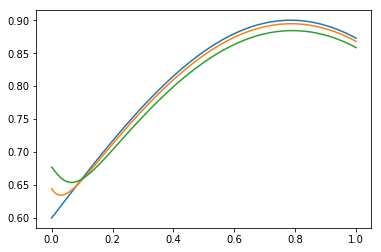

In [224]:
import numpy as np
import matplotlib.pyplot as plt

def TrehDiag(a,b,c,f, j):
    alpha = [0]
    beta = [0]
    n = len(f)
    x = [0]*n
    print(f[0])

    f[0] =  0.6#  (h/(2*tu**2))*(-2*ys[j, 0]   +ys[j-1,0]) - 0.6 - func(0, tu*j)*h/2-(1-2*sigma)*(y_x_rlt(1,j))-sigma*(y_x_rlt(1, j-1))
    for i in range(1, n-1):
        f[i] = -(2*ys[j, i]/tu**2 - ys[j-1, i]/tu**2 + (1-2*sigma)*y_xx(i, j) + sigma*y_xx(i, j-1) + func(i*h, tu*j))
    #f[n-1] = (ys[j-1, n-1] - 2*ys[j, n-1])*h/(2*tu**2) - np.cos(2) - func(1, t[j])*h/2 - (1-2*sigma)*y_x_left(n-1, j) - sigma*y_x_left(n-1, j-1)
    f[n-1] = -((h/(2*tu**2))*(-2*ys[j, n-1] + ys[j-1, n-1]) - 0.6*np.cos(2) - func(1, tu*j)*h/2) - (1-2*sigma)*y_x_left(n-1, j) - sigma*y_x_left(n-1,j-1)
    
    for i in range(n-1):
        alpha.append(-b[i]/(a[i-1]*alpha[i] + c[i]))
        beta.append((f[i] - a[i-1]*beta[i])/(a[i-1]*alpha[i] + c[i]))
    x[n-1] = (f[n-1] - a[n-2]*beta[n-1])/(c[n-1] + a[n-2]*alpha[n-1])
    for i in reversed(range(n-1)):
        x[i] = alpha[i+1]*x[i+1] + beta[i+1]
    return x

def func(x, t):
    return -1.8*np.cos(3*t) + 1.2*np.sin(x)

def y_x0(x):
    return 0.3*(np.sin(2*x) + 2)

def y_0t(t):
    return (0.2*np.cos(3*t) + 0.3)

def y_tt(i, j):
    return (ys[j+1, i] - 2*ys[j, i] + ys[j-1, i])/tu**2

def y_x_left(i, j):
    return (ys[j, i] - ys[j, i-1])/h

def y_x_rlt(i, j):
    return (ys[j,1]-ys[j,0])/h

def y_xx(i, j):
    return (ys[j, i+1] - 2*ys[j, i] + ys[j, i-1])/h**2

T = 0.5
Nx = 100

h = 1/Nx
tu = 0.05

Nt = int(T/tu)

sigma = 1/2

x = np.array([i*h for i in range (Nx+1)])
t = np.array([i*tu*T for i in range (Nt+1)])



ys = np.zeros((Nt + 1, Nx + 1))


ys[0] = y_x0(x)

ys[1] = y_x0(x)

A = np.zeros((Nx))
B = np.zeros((Nx))
C = np.zeros((Nx + 1))
F = np.zeros((Nx + 1))

C[0] = 1/h#(-sigma/h-h/(2*tu**2))
B[0] = -1/h#(sigma/h)

C[Nx] = sigma/h+h/(2*tu**2)
A[Nx - 1] = -sigma/h

for i in range(1, Nx):
    A[i-1] = sigma/h**2
    B[i] = sigma/h**2
    C[i] = -(1/tu**2 + 2*sigma/h**2)

for j in range(1, Nt):
    ys[j+1] = TrehDiag(A,B,C,F,j)

plt.plot(x, ys[1])
plt.plot(x, ys[2])
plt.plot(x, ys[3])
plt.show()

In [225]:
for i in range(11):
    print("time", i*tu,ys[i])

time 0.0 [0.6        0.6059996  0.6119968  0.6179892  0.62397441 0.62995002
 0.63591366 0.64186293 0.64779546 0.65370887 0.6596008  0.66546889
 0.67131079 0.67712417 0.68290669 0.68865606 0.69436997 0.70004613
 0.70568227 0.71127614 0.7168255  0.72232814 0.72778184 0.73318443
 0.73853375 0.74382766 0.74906404 0.7542408  0.75935586 0.76440718
 0.76939274 0.77431055 0.77915863 0.78393506 0.78863791 0.79326531
 0.7978154  0.80228637 0.80667643 0.81098383 0.81520683 0.81934375
 0.82339294 0.82735277 0.83122166 0.83499807 0.83868049 0.84226743
 0.84575747 0.84914921 0.8524413  0.85563241 0.85872127 0.86170664
 0.86458734 0.86736221 0.87003013 0.87259005 0.87504093 0.8773818
 0.87961173 0.88172981 0.8837352  0.8856271  0.88740476 0.88906746
 0.89061453 0.89204536 0.89335938 0.89455606 0.89563492 0.89659553
 0.8974375  0.89816051 0.89876425 0.8992485  0.89961304 0.89985775
 0.89998252 0.89998729 0.89987208 0.89963692 0.89928191 0.8988072
 0.89821296 0.89749944 0.89666693 0.89571575 0.8946463 

In [208]:
print(ys[3])

[0.54643555 0.57643555 0.60550531 0.63360463 0.66063775 0.68646016
 0.71089638 0.73375637 0.75484809 0.77398627 0.79099833 0.80572815
 0.81803831 0.82781072 0.83494563 0.83935829 0.84097231 0.83970829
 0.83546628 0.82810214 0.81740385]
